#### In this notebook different models will be use to predict multioutput :diameter, absrobance, and PL at once.
* Optimization will be run to find the optimized estimator, max_features, and random_state number 
* The skill of the model will be reported as an error in those predictions: 
    * MAE
    * R2

In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [3]:
df = pd.read_csv('dataset_CdSe_augmented.csv')

In [4]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]

output_col = ['diameter_nm','abs_nm', 'emission_nm']

X = df[input_col]

y = df[output_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [5]:
y

,diameter_nm,abs_nm,emission_nm
0,3.41,566,575.000000
1,2.50,474,617.000000
2,2.60,526,556.000000
3,3.20,559,580.000000
4,3.60,574,598.000000
...,...,...,...
191,1.70,450,537.166667
192,2.50,530,566.555556
193,3.50,585,582.777778
194,3.70,590,586.777778


# Preliminary evaluatiopn of some regressions

Note: The MSE or r2 of the multiouput regression outcomes are the average of all MSE or r2 outputs. 

In [6]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, y_train)                 
    y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(y_test.iloc[:, column], y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.9168744937974438 
 R^2 for Absorbance is  0.9293147518392567 
 R^2 for PL is  0.6768998327171732 
 

K-nn 

 R^2 for diameter is  0.5299871114681851 
 R^2 for Absorbance is  0.5635215932075304 
 R^2 for PL is  0.24204158072066917 
 

Linear regression 

 R^2 for diameter is  0.2967892074509375 
 R^2 for Absorbance is  0.43087308864726737 
 R^2 for PL is  0.26041367605528687 
 

Ridge 

 R^2 for diameter is  0.3470856223592701 
 R^2 for Absorbance is  0.4614218649693882 
 R^2 for PL is  0.20534611051519314 
 

Lasso 

 R^2 for diameter is  -0.06539792996873395 
 R^2 for Absorbance is  0.4781862565639421 
 R^2 for PL is  0.2915620876642667 
 

ElasticNet 

 R^2 for diameter is  -0.006629524807860276 
 R^2 for Absorbance is  0.39045072048176377 
 R^2 for PL is  0.1689674258804309 
 

RandomForestRegressor 

 R^2 for diameter is  0.5305174868109532 
 R^2 for Absorbance is  0.7074737867196792 
 R^2 for PL is  0.4790905723839334 
 

Decision Tree Regress

From the R2 values above, Extra Trees, Random Forest, Ridge, Decision Tree, and MultiO/P AdaB give the best predictions.

Now, we are going to optimize each of the the above regressions by grid searching the parameters

# Extra Trees

In [8]:

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 60, 2):
            
            ET_reg = ExtraTreesRegressor(n_estimators=i,
                                         max_features=j,     
                                         random_state=k).fit(X_train, y_train)
            
            
            ET_y_pred = ET_reg.predict(X_test)
            
            ET_mae = mean_absolute_error(y_test, pd.DataFrame(ET_y_pred))
            
            if (min_mae > ET_mae):
                min_mae = ET_mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [08:47<00:00, 17.59s/it]

7.814118353909461 6 28 46


From the results above the parameters are applied to the model

In [39]:
ET_reg = ExtraTreesRegressor(n_estimators=6,
                            max_features=28,     
                            random_state=46).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)

outputs = ('diameter: ', 'abs: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.819568908656058 ; MSE: 0.3403719210833332 ; RMSE: 0.5834140220146694 ; MAE: 0.33896000000000004
abs:  r2: 0.9371216835959785 ; MSE: 311.1854166666665 ; RMSE: 17.640448312519343 ; MAE: 13.412499999999994
emission:  r2: 0.8188539549567152 ; MSE: 252.48458028501742 ; RMSE: 15.889763380397374 ; MAE: 9.69089506172839


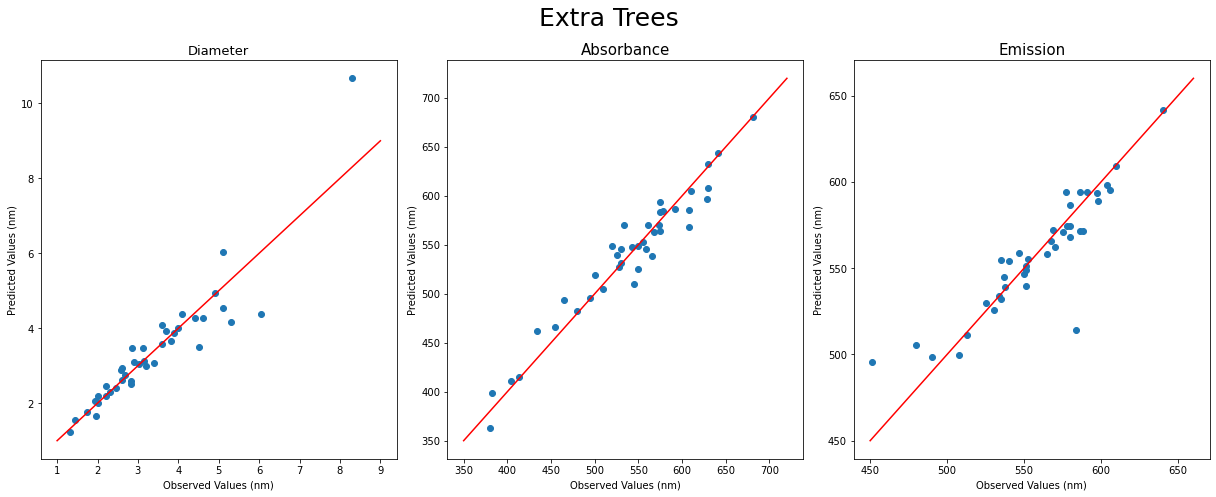

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Extra Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(ET_y_pred).loc[:, 0],'o')
ax1.plot([1,9],[1,9], color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


ax2.plot(y_test.iloc[:, 1], pd.DataFrame(ET_y_pred).loc[:, 1],'o')
ax2.plot([350,720],[350,720], color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(ET_y_pred).loc[:, 2],'o')
ax3.plot([450,660],[450,660], color = 'r')
ax3.set_title('Emission', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Random Forest

In [16]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(5, 31)):
    for j in range(5, 31):
        for k in range(2, 44, 2):
                RF_reg = RandomForestRegressor(max_depth=i, 
                                                n_estimators=j, 
                                                max_features=k,
                                                random_state=45).fit(X_train, y_train)

                RF_y_pred = RF_reg.predict(X_test)

                RF_mae = mean_absolute_error(y_test, pd.DataFrame(RF_y_pred))

                if (min_mae > RF_mae):
                    min_mae = RF_mae
                    min_i = i
                    min_j = j
                    min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [06:24<00:00, 14.79s/it]

9.96718625385802 13 16 34


From the results above (*take a long time to run*) the parameters are applied to the model

In [23]:
RF_reg = RandomForestRegressor(max_depth=13, 
                               n_estimators=16, 
                               max_features=34,
                               random_state=45).fit(X_train, y_train)
            
RF_y_pred = RF_reg.predict(X_test)

outputs = ('diameter: ', 'abs : ', 'emission: ')
for i in range(0, 3):
    RF_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE)

diameter:  r2: 0.8423084985072529 ; MSE: 0.2974751130850695 ; RMSE: 0.5454127914571398 ; MAE: 0.3443336458333334
abs :  r2: 0.8928561350803388 ; MSE: 530.2560589260524 ; RMSE: 23.02728943940325 ; MAE: 16.300325520833333
emission:  r2: 0.7376359694612387 ; MSE: 365.6876533883803 ; RMSE: 19.122961417844785 ; MAE: 13.256899594907395


# Decision Trees

In [22]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in range(5, 15):
        for k in range(40, 60):
            for m in range (10, 50, 2):
                DT_reg = DecisionTreeRegressor(max_depth=i, 
                                               max_features=j,
                                               random_state=k, 
                                               max_leaf_nodes=m).fit(X_train, y_train)

                DT_y_pred = DT_reg.predict(X_test)

                DT_mae = mean_absolute_error(y_test, pd.DataFrame(DT_y_pred))

                if (min_mae > DT_mae):
                    min_mae = DT_mae
                    min_i = i
                    min_j = j
                    min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 10/10 [04:41<00:00, 28.12s/it]

11.593633053016944 7 10 59


From the results above the parameters are applied to the model

# AdaBoost Regressor

In [27]:
min_mae = 99999

min_i, min_j, min_k, min_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in np.arange(0.1, 2.0, 0.02):
        for k in ('linear', 'square', 'exponential'):
            for m in range(40, 60):
                AB_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators=i, 
                                                                learning_rate=j, 
                                                                loss=k, 
                                                                random_state=m)).fit(X_train, y_train)

                AB_y_pred = AB_reg.predict(X_test)

                AB_mae = mean_absolute_error(y_test, pd.DataFrame(AB_y_pred))

                if (min_mae > AB_mae):
                    min_r2 = AB_mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_m = m
            
print(min_mae, min_i, min_j, min_k, min_m )

100%|██████████| 10/10 [45:58<00:00, 275.89s/it]

99999 14 1.9800000000000004 exponential 59


# Ridge

In [32]:
min_mae = 99999

min_i, min_j = 0, 0

for i in tqdm(np.arange(0.04, 2.00, 0.02)):
    for j in range(20, 60):
        R_reg =  Ridge(alpha=i,
                       random_state=j).fit(X_train, y_train)
            
            
        R_y_pred = R_reg.predict(X_test)
            
        R_mae = mean_absolute_error(y_test, pd.DataFrame(R_y_pred))
            
        if (min_mae > R_mae):
            min_mae = R_mae
            min_i = i
            min_j = j
            
print(min_mae, min_i, min_j)

100%|██████████| 98/98 [00:35<00:00,  2.76it/s]

21.131585574771567 0.6799999999999999 20


From the results above the parameters are applied to the model

# K Neighbors

In [33]:
min_mae = 9999

min_i = 0

min_j = 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, y_train)

        KNN_y_pred = KNN_reg.predict(X_test)

        KNN_mae = mean_absolute_error(y_test, pd.DataFrame(KNN_y_pred))

        if (min_mae > KNN_mae):
                min_mae = KNN_mae
                min_i = i
                min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:23<00:00,  1.64it/s]

13.463965802469135 1 13


### Extra Trees is the best model


In [50]:
ET_reg = ExtraTreesRegressor(n_estimators=6,
                            max_features=28,     
                            random_state=46).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)

In [59]:
joblib.dump(ET_reg, "./model_CdSe_MO_ExtraTrees.joblib")

['./model_CdSe_MO_ExtraTrees.joblib']

### Feature Importance


In [55]:
importance_dict = dict()
for i in range(0,48):
    importance_dict[input_col[i]] = ET_reg.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance

[('Time_min (min)', 0.34433869984018867),
 ('Growth Temp (Celsius)', 0.21176488739916322),
 ('x1_benzoic acid', 0.06798686991765256),
 ('x2_dodecylamine', 0.06798686991765089),
 ('x1_dodecylphosphonic acid', 0.02942719051362776),
 ('x1_myrstic acid', 0.02578226392366001),
 ('Chalcogen_mmol (mmol)', 0.024358162690456858),
 ('x3_None', 0.021078533964139116),
 ('x4_phenyl ether', 0.020580994944756566),
 ('S_I_amount (g)', 0.01945939149939365),
 ('x2_hexadecylamine', 0.017480683790055674),
 ('x0_cadmium acetate', 0.017347029218349113),
 ('Metal_mmol (mmol)', 0.012889293653131252),
 ('x3_triphenylphosphine', 0.012280333591654426),
 ('x3_trioctylphosphine', 0.009846817738903776),
 ('x5_trioctylphosphine oxide', 0.009736523114204757),
 ('Phosphines_mmol (mmol)', 0.009002235159191492),
 ('x1_stearic acid', 0.008078092391377488),
 ('Amines_mmol (mmol)', 0.007935617742527252),
 ('x0_cadmium oxide', 0.0075441952250496795),
 ('S_II_amount (g)', 0.007366955670698844),
 ('x4_trioctylphosphine oxide'

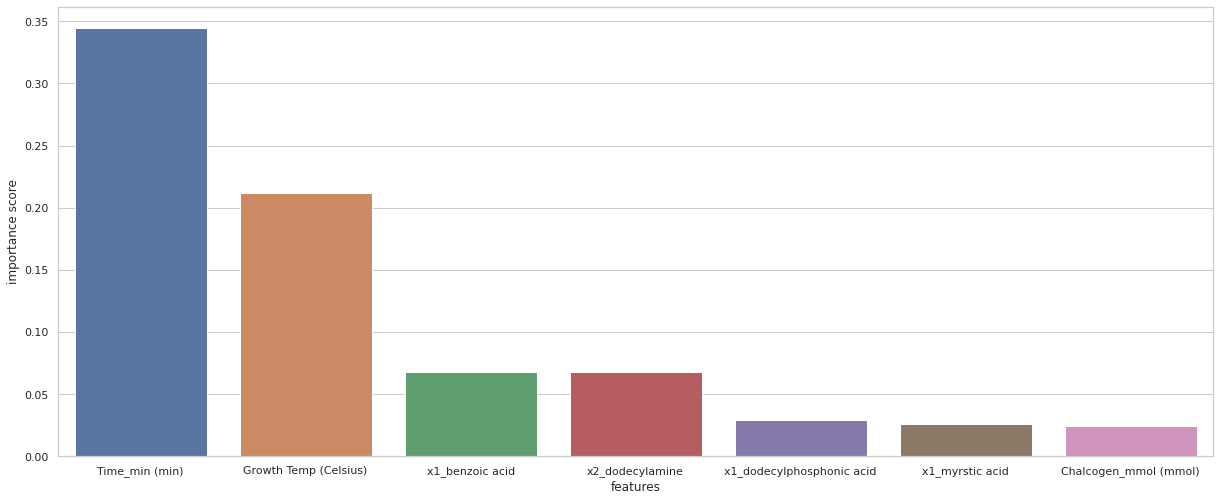

In [58]:
top7 = DataFrame(sorted_importance[0:7], columns=['features', 'importance score'])



import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)